In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')


In [2]:
df = pd.read_csv('hotel_booking.csv')

In [3]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


# Exploratory data analysis

In [4]:
df.shape

(119390, 32)

In [5]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [7]:
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])

In [8]:
df.describe(include = 'object')

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status
count,119390,119390,119390,118902,119390,119390,119390,119390,119390,119390,119390
unique,2,12,5,177,8,5,10,12,3,4,3
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out
freq,79330,13877,92310,48590,56477,97870,85994,74053,104641,89613,75166


In [9]:
for col in df.describe(include = 'object').columns:
    print(col)
    print(df[col].unique())
    print('-'*50)

hotel
['Resort Hotel' 'City Hotel']
--------------------------------------------------
arrival_date_month
['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']
--------------------------------------------------
meal
['BB' 'FB' 'HB' 'SC' 'Undefined']
--------------------------------------------------
country
['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' nan 'ROU' 'NOR' 'OMN' 'ARG' 'POL'
 'DEU' 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST'
 'CZE' 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR'
 'UKR' 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO'
 'ISR' 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM'
 'HRV' 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY'
 'KWT' 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL' 'SEN'
 'SYC' 'AZE' 'BHR' 'NZL' 'THA' 'DOM' 'MKD' 'MYS' 'ARM' 'JPN' 'LKA' 'CUB'
 'CMR' 'BIH' 'MUS' 'COM' 'SUR' 'UGA' 'BGR' 'CIV' 'J

In [10]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [11]:
df.drop(['company','agent'], axis = 1 , inplace = True)
df.dropna(inplace = True)

In [12]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

In [13]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000
mean,0.371352,104.311435,2016.157656,27.166555,15.800880,0.928897,2.502145,1.858391,0.104207,0.007948,0.032011,0.087142,0.131634,0.221181,2.330754,102.003243,0.061885,0.571683
std,0.483168,106.903309,0.707459,13.589971,8.780324,0.996216,1.900168,0.578576,0.399172,0.097380,0.176029,0.845869,1.484672,0.652785,17.630452,50.485862,0.244172,0.792678
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000
75%,1.000000,161.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,5400.000000,8.000000,5.000000


# Data analysis and Visualization

0    0.628648
1    0.371352
Name: is_canceled, dtype: float64


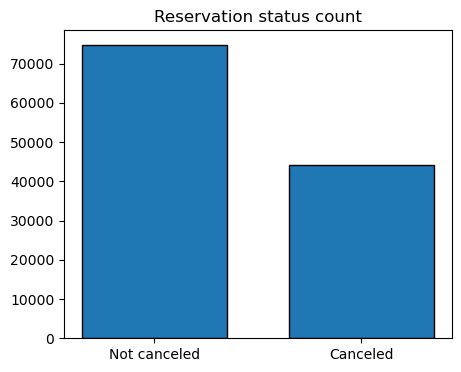

In [14]:
cancelled_percentage  = df['is_canceled'].value_counts(normalize = True)
print(cancelled_percentage)

plt.figure(figsize = (5,4))
plt.title('Reservation status count')
plt.bar(['Not canceled','Canceled'],df['is_canceled'].value_counts(),edgecolor = 'k',width = 0.7)
plt.show()

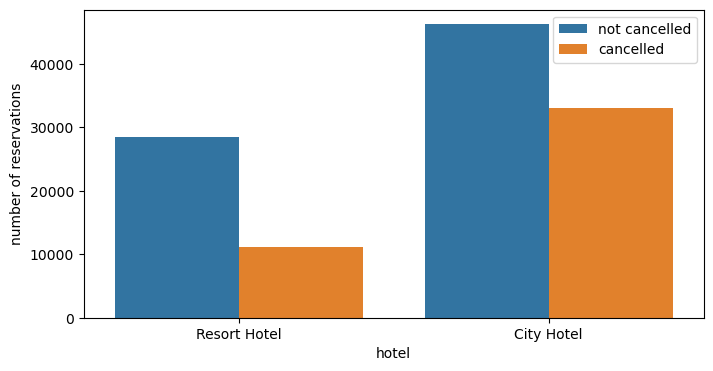

In [15]:
plt.figure(figsize = (8,4))
axl = sns.countplot(x = 'hotel' , hue = 'is_canceled',data= df)
legend_labels = axl.get_legend_handles_labels()
axl.legend(bbox_to_anchor = (1,1))
plt.xlabel('hotel')
plt.ylabel('number of reservations')
plt.legend(['not cancelled', 'cancelled'])
plt.show()

In [16]:
resort_hotel = df[df['hotel']=='Resort Hotel']
resort_hotel['is_canceled'].value_counts(normalize = True)

0    0.72025
1    0.27975
Name: is_canceled, dtype: float64

In [17]:
city_hotel = df[df['hotel']=='City Hotel']
city_hotel['is_canceled'].value_counts(normalize = True)

0    0.582911
1    0.417089
Name: is_canceled, dtype: float64

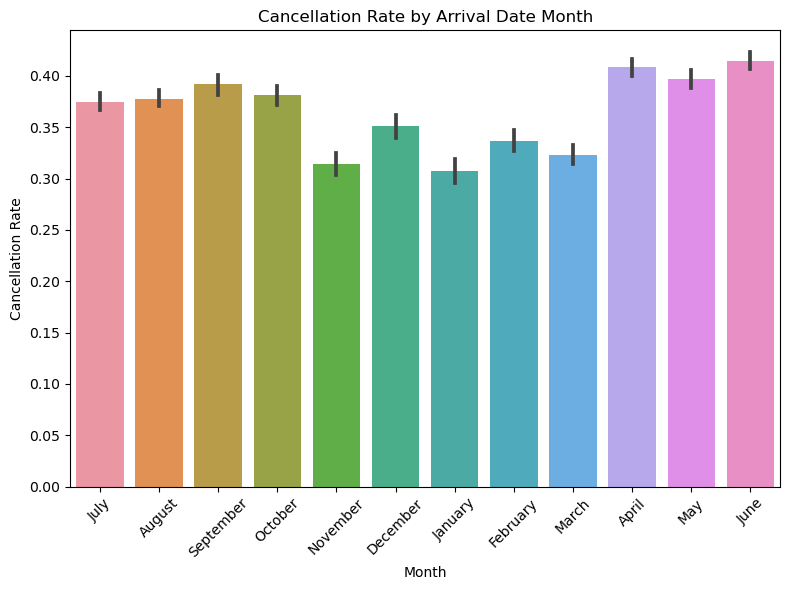

In [18]:
# Bar plot: Cancellation rate by arrival date month
plt.figure(figsize=(8, 6))
sns.barplot(x="arrival_date_month", y="is_canceled", data=df)
plt.title("Cancellation Rate by Arrival Date Month")
plt.xlabel("Month")
plt.ylabel("Cancellation Rate")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

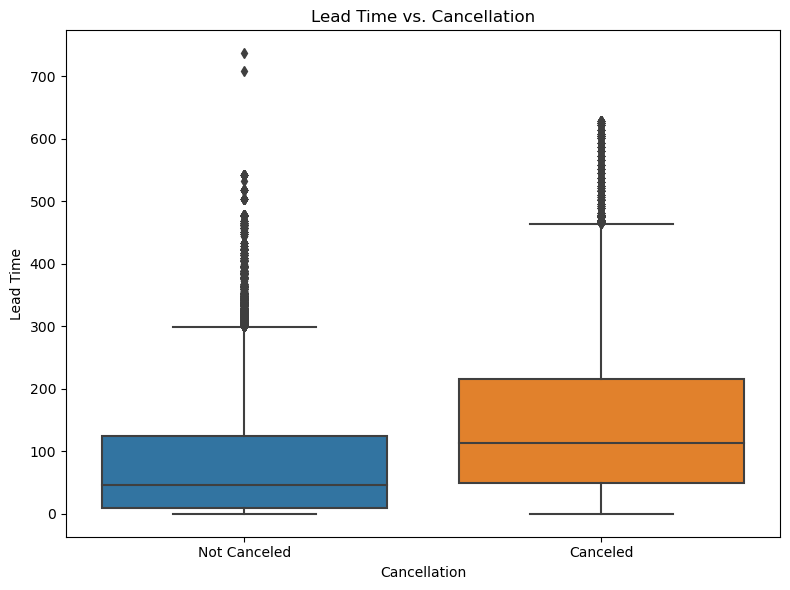

In [19]:
# Box plot: Lead time vs. Cancellation
plt.figure(figsize=(8, 6))
sns.boxplot(x="is_canceled", y="lead_time", data=df)
plt.title("Lead Time vs. Cancellation")
plt.xlabel("Cancellation")
plt.ylabel("Lead Time")
plt.xticks([0, 1], ["Not Canceled", "Canceled"])
plt.tight_layout()
plt.show()

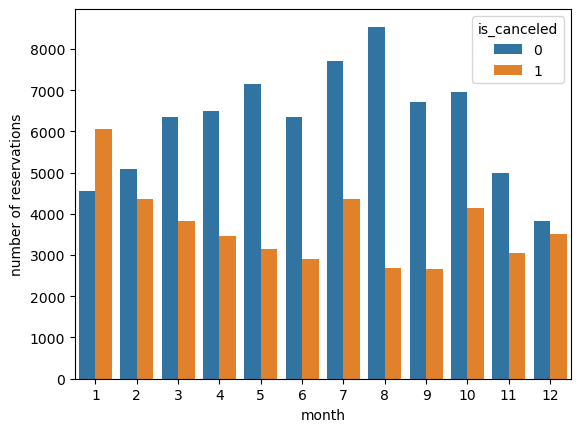

In [21]:
df['month'] = df['reservation_status_date'].dt.month
axl = sns.countplot(x = 'month', hue = 'is_canceled',data = df)
plt.xlabel('month')
plt.ylabel('number of reservations')
plt.show()

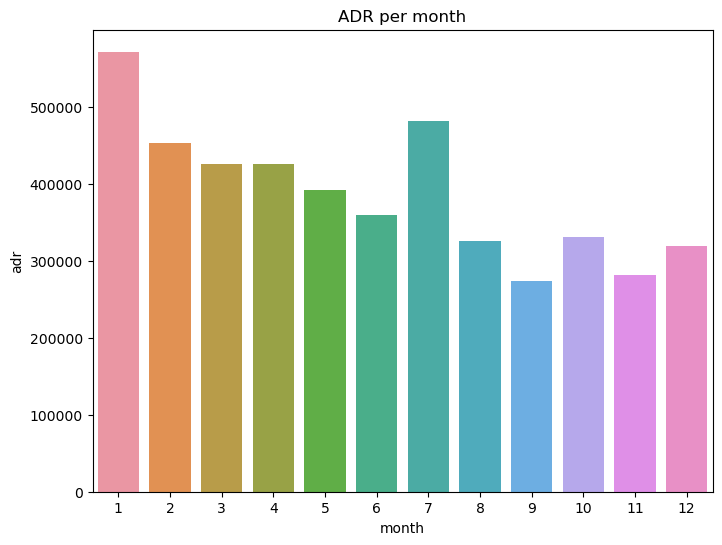

In [32]:
plt.figure(figsize = (8,6))
plt.title('ADR per month')
sns.barplot(x = 'month',y = 'adr', data  = df[df['is_canceled'] ==1 ].groupby('month')[['adr']].sum().reset_index())
plt.show()


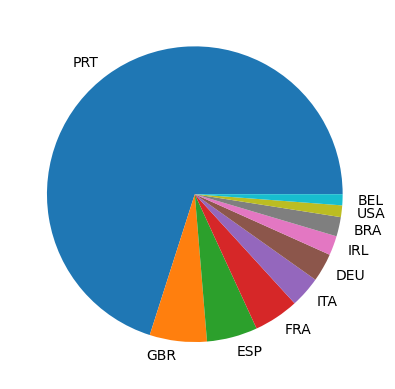

In [24]:
cancelled_data = df[df['is_canceled']==1]
top_10_country = cancelled_data['country'].value_counts()[:10]
plt.pie(top_10_country,labels = top_10_country.index)
plt.show()

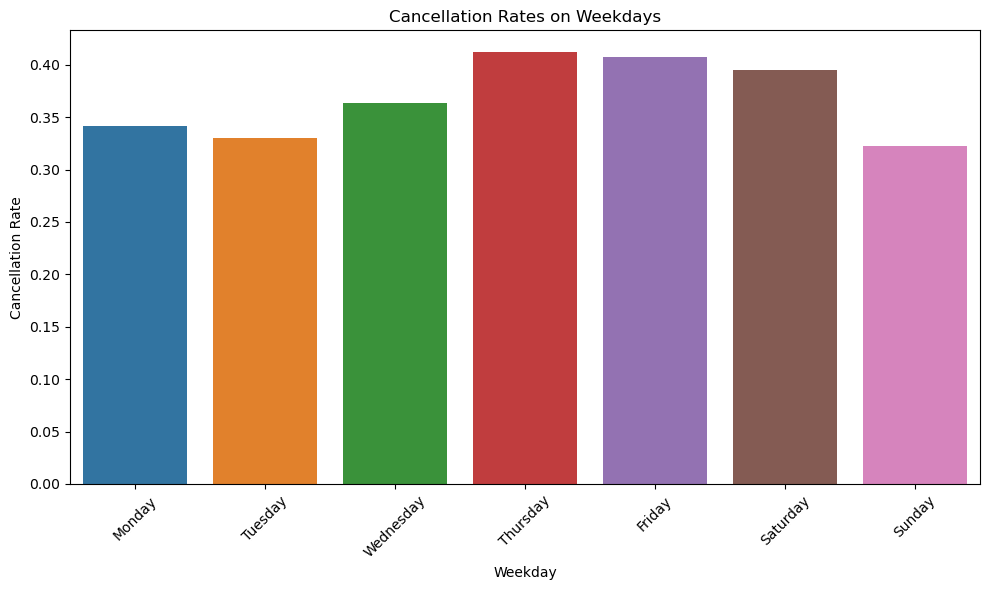

In [26]:
# Create a new column to represent the day of the week (0 = Monday, 6 = Sunday)
df['arrival_date_weekday'] = pd.to_datetime(df['arrival_date_year'].astype(str) + '-' +
                                              df['arrival_date_month'] + '-' +
                                              df['arrival_date_day_of_month'].astype(str)).dt.dayofweek

# Define the names of the weekdays
weekday_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Calculate cancellation rates for each day of the week
cancellation_rates = df.groupby('arrival_date_weekday')['is_canceled'].mean()

# Create a bar plot to visualize cancellation rates for weekdays
plt.figure(figsize=(10, 6))
sns.barplot(x=cancellation_rates.index, y=cancellation_rates.values)
plt.title("Cancellation Rates on Weekdays")
plt.xlabel("Weekday")
plt.ylabel("Cancellation Rate")
plt.xticks(ticks=range(7), labels=weekday_names, rotation=45)
plt.tight_layout()
plt.show()

In [27]:

# Filter the data for repeated guests
repeated_guests = df[df['is_repeated_guest'] == 1]

# Calculate the total number of repeated guests
total_repeated_guests = len(repeated_guests)

# Calculate the number of canceled bookings among repeated guests
canceled_repeated_guests = repeated_guests[repeated_guests['is_canceled'] == 1]
total_canceled_repeated_guests = len(canceled_repeated_guests)

# Calculate the percentage of canceled bookings among repeated guests
percentage_canceled = (total_canceled_repeated_guests / total_repeated_guests) * 100

print(f"Percentage of repeated guests who canceled their bookings: {percentage_canceled:.2f}%")

Percentage of repeated guests who canceled their bookings: 14.50%
